# Validación del modelo de regresión lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/ads/Advertising.csv')

Para comprobar si existe un problema de overfiting, hay que comprobar si el modelo se ajusta demasiado bien al conjunto de datos, pero no es capaz de modelar correctamente cualquier otro elemento que no forme parte del dataset.  

La primera parte es entrenar y dividir el dataset.

## Dividir el dataset en conjunto de entrenamiento y de testing

In [7]:
a = np.random.randn(len(data))

(array([ 4.,  4., 17., 40., 55., 33., 29.,  9.,  6.,  3.]),
 array([-2.85263578, -2.26143868, -1.67024158, -1.07904449, -0.48784739,
         0.10334971,  0.6945468 ,  1.2857439 ,  1.876941  ,  2.46813809,
         3.05933519]),
 <a list of 10 Patch objects>)

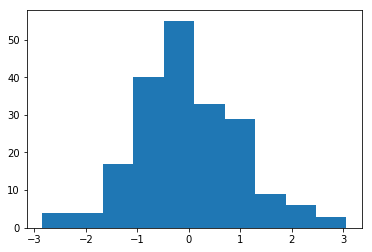

In [8]:
plt.hist(a)

El 80% de los elementos serán para entrenar y el resto para validar.

In [10]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [11]:
len(training), len(testing)

(157, 43)

Vamos a crear el modelo que funciona mejor, el cual ya conocemos que es solamente tomando los datos procedentes de TV y radio como variables predictorias.

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV+Radio', data=training).fit()

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     670.6
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           9.74e-77
Time:                        21:49:12   Log-Likelihood:                -302.66
No. Observations:                 157   AIC:                             611.3
Df Residuals:                     154   BIC:                             620.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8455      0.334      8.532      0.000       2.187       3.504
TV             0.0460      0.002     29.188      0.000       0.043       0.049
Radio          0.1886      0.009     20.068      0.000       0.170       0.207
==============================================================================
Omnibus:                       54.445   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.192
Skew:                          -1.402   Prob(JB):                     2.43e-33
Kurtosis:                       6.886   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.8455 + 0.0460 * TV + 0.1886 * Radio

## Validación del modelo con el conjunto de testing

Para ello vamos a predecir el valor de las variables del conjunto de testing, el cual no hemos utilizado

In [16]:
sales_pred = lm.predict(testing)
sales_pred

5      12.468164
13      8.760115
17     23.247654
21     14.718521
25     15.588755
30     21.644972
31     11.316236
36     23.373362
37     15.595879
40     16.358487
47     21.698629
55     21.304212
60      5.681654
61     22.908516
62     16.767334
63     13.148412
65      7.770860
82     10.135063
83     14.382164
84     20.768171
94     10.422196
105    17.934789
114    15.266370
116    11.940332
125     9.078858
127     6.531598
129     7.848060
134    11.821631
136    11.377716
138     9.706714
146    15.257545
147    23.264834
148    12.192816
152    16.321884
156    15.365560
169    17.911408
171    14.347930
179    12.342697
186     9.653144
187    17.041603
189     5.987124
195     5.299081
199    15.135045
dtype: float64

Ahora veremos cómo se separa el conjunto de la predicción del original

In [18]:
SSD = sum((testing['Sales']-sales_pred)**2)
SSD

122.83798913070596

In [22]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7524125451124941

In [24]:
sales_mean = np.mean(testing['Sales'])
error = RSE/sales_mean
error

0.12234736067517005